In [2]:
import pickle
from collections import defaultdict, Counter
from datetime import date
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [14]:
source_dict = {}
sources = ["dkos", "motherjones", "nymag", "nypost", "townhall", "breitbart"]
for source in sources:
    print("Opening Source", source)
    file = open(source + '_bigrams_new.p', 'rb')
    source_dict[source] = pickle.load(file)
    file.close()

Opening Source dkos
Opening Source motherjones
Opening Source nymag
Opening Source nypost
Opening Source townhall
Opening Source breitbart


In [15]:
# number of articles per source
for source, articles in source_dict.items():
    print(source + ":", len(articles))

dkos: 96030
motherjones: 18534
nymag: 19324
nypost: 2119
townhall: 97730
breitbart: 84909


In [17]:
for source, articles in source_dict.items():
    urls = set([a['url'] for a in articles])
    print(source + ":", len(urls))

dkos: 96022
motherjones: 18505
nymag: 18856
nypost: 2116
townhall: 96448
breitbart: 84908


In [50]:
def smooth(arr, K):
    smoothed_arr = []
    for i, _ in enumerate(arr):
        low = max(0, i - K//2)
        high = min(i + K//2 + 1, len(arr))
        window = arr[low:high]
        smoothed_value = sum(window) / len(window)
        smoothed_arr.append(smoothed_value)
    return smoothed_arr

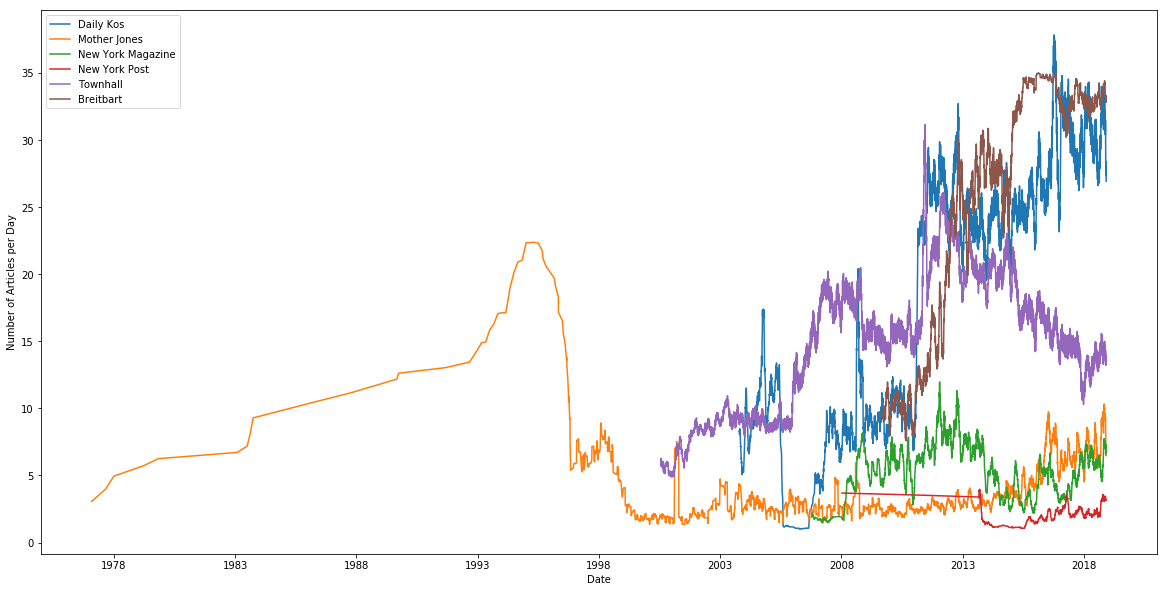

In [84]:
plt.figure(figsize=(20,10))
for source, articles in news_bi_articles.items():
    article_dates = [date(a['date']['year'], a['date']['month'], a['date']['day']) for a in articles]
    counts = Counter(article_dates)
    x, y = zip(*sorted(counts.items()))
    plt.plot(x, smooth(y, 31))
plt.ylabel("Number of Articles per Day")
plt.xlabel("Date")
plt.legend(['Daily Kos', 'Mother Jones', 'New York Magazine', 'New York Post', 'Townhall', 'Breitbart'], loc = 'upper left')
plt.show()

In [51]:
bigrams = pickle.load(open('bigrams.p', 'rb'))

In [52]:
speeches = pickle.load(open('speeches.p', 'rb'))

In [54]:
d_dates_bi = []
r_dates_bi = []
for session in bigrams:
    for bigram, speech_ids in bigrams[session].items():
        for speech_id in speech_ids:
            speech = speeches[session][speech_id]
            party = speech['party']
            speech_date = date(speech['date']['year'], speech['date']['month'], speech['date']['day'])
            if party == 'D':
                d_dates_bi.append(speech_date)
            else:
                r_dates_bi.append(speech_date)

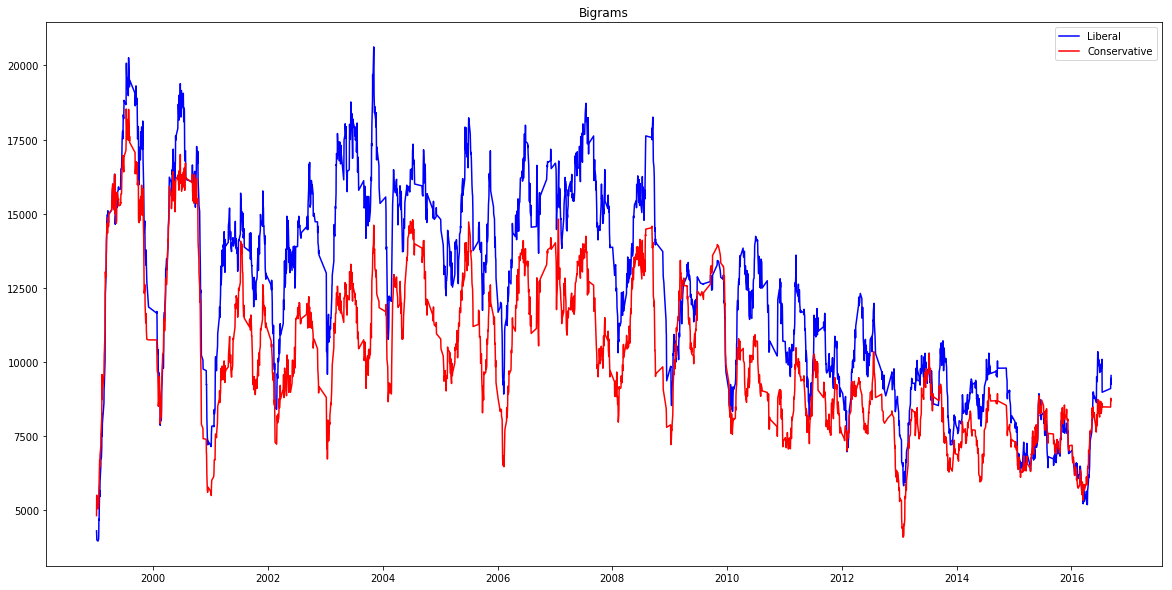

In [59]:
d_x, d_y = zip(*sorted(Counter(d_dates_bi).items()))
r_x, r_y = zip(*sorted(Counter(r_dates_bi).items()))

plt.figure(figsize=(20,10))
plt.title('Bigrams')
plt.plot(d_x, smooth(d_y, 31), color = 'b')
plt.plot(r_x, smooth(r_y, 31), color = 'r')
plt.legend(['Liberal', 'Conservative'], loc = 'upper right')
plt.show()

In [55]:
trigrams = pickle.load(open('trigrams.p', 'rb'))

In [56]:
d_dates_tri = []
r_dates_tri = []
for session in trigrams:
    for trigram, speech_ids in trigrams[session].items():
        for speech_id in speech_ids:
            speech = speeches[session][speech_id]
            party = speech['party']
            speech_date = date(speech['date']['year'], speech['date']['month'], speech['date']['day'])
            if party == 'D':
                d_dates_tri.append(speech_date)
            else:
                r_dates_tri.append(speech_date)

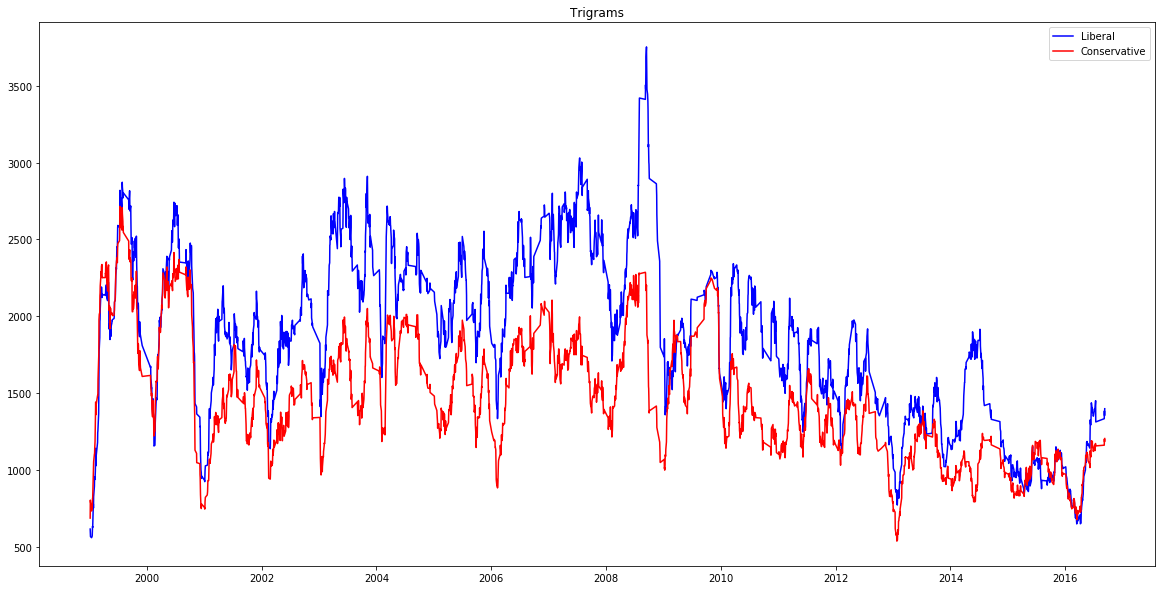

In [60]:
d_x, d_y = zip(*sorted(Counter(d_dates_tri).items()))
r_x, r_y = zip(*sorted(Counter(r_dates_tri).items()))

plt.figure(figsize=(20,10))
plt.title('Trigrams')
plt.plot(d_x, smooth(d_y, 31), color = 'b')
plt.plot(r_x, smooth(r_y, 31), color = 'r')
plt.legend(['Liberal', 'Conservative'], loc = 'upper right')
plt.show()

In [70]:
file = open('new_bigrams.p', 'rb')
new_bigrams = pickle.load(file)
file.close()

In [71]:
d_dates_new = []
r_dates_new = []
for session in new_bigrams:
    for bigram, speech_ids in new_bigrams[session].items():
        for speech_id in speech_ids:
            speech = speeches[session][speech_id]
            party = speech['party']
            speech_date = speech['date']
            speech_date = date(speech_date['year'], speech_date['month'], speech_date['day'])
            if party == 'D':
                d_dates_new.append(speech_date)
            else:
                r_dates_new.append(speech_date)

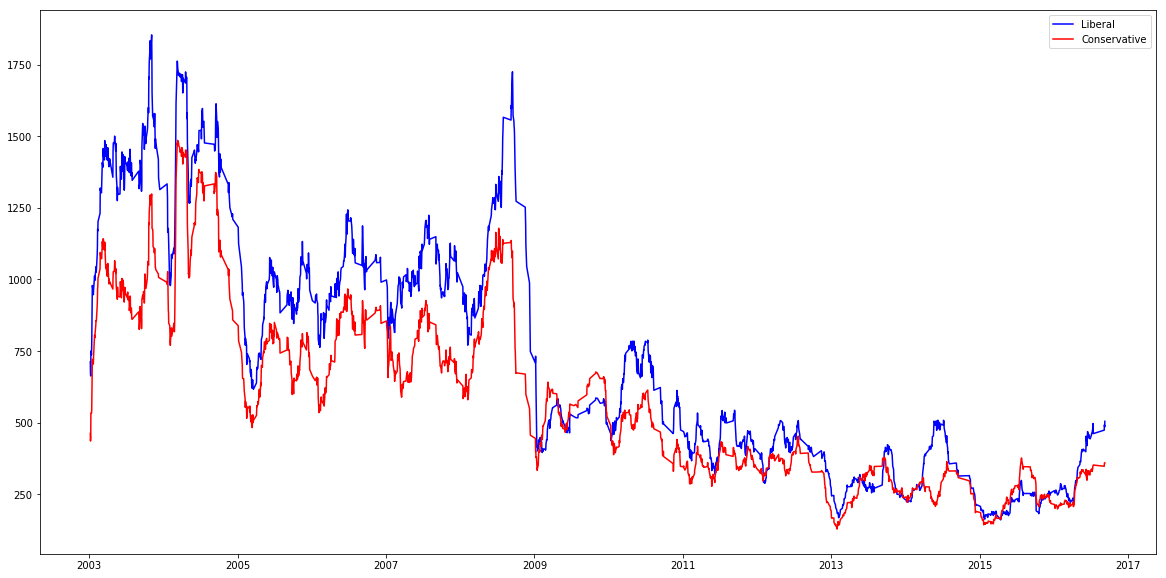

In [75]:
d_x_new, d_y_new = zip(*sorted(Counter(d_dates_new).items()))
r_x_new, r_y_new = zip(*sorted(Counter(r_dates_new).items()))

plt.figure(figsize=(20,10))
plt.plot(d_x_new, smooth(d_y_new, 31), color = 'b')
plt.plot(r_x_new, smooth(r_y_new, 31), color = 'r')
plt.legend(['Liberal', 'Conservative'], loc = 'upper right')
plt.show()

In [4]:
new_bi_pearsons = pickle.load(open('new_bi_pearsons.p', 'rb'))
new_bi_pearsons

{108: {('incred', 'talent'): -4.074230267248544e-09,
  ('five', 'grandchildren'): -2.2569734279913854e-08,
  ('break', 'anoth'): 3.618044579568116e-07,
  ('ideal', 'equal'): -8.96478987522953e-08,
  ('heritag', 'hope'): 1.2407436042684656e-06,
  ('sustain', 'countri'): -5.098492213919052e-08,
  ('stand', 'ground'): 3.3464382702659095e-07,
  ('repres', 'mainstream'): -8.697134763251336e-10,
  ('commit', 'abroad'): -2.5913989521606922e-08,
  ('test', 'advanc'): -7.81456204081954e-08,
  ('hold', 'titl'): 3.618044579568116e-07,
  ('upon', 'enter'): -8.96478987522953e-08,
  ('offici', 'republican'): -3.514542549677017e-09,
  ('honor', 'toni'): 1.552632477854395e-06,
  ('leader', 'gentlewoman'): -4.46977324982585e-07,
  ('california', 'honor'): -8.96478987522953e-08,
  ('res', '2'): 3.0850160223248947e-06,
  ('tile', 'presid'): -3.802473204020227e-08,
  ('res', '4'): 3.2965882065241353e-07,
  ('comprehens', 'chang'): 3.618044579568116e-07,
  ('understand', 'cut'): -2.5913989521606922e-08,
  

In [7]:
pearsons108 = new_bi_pearsons[108]
pearsons108.values()

dict_values([-4.074230267248544e-09, -2.2569734279913854e-08, 3.618044579568116e-07, -8.96478987522953e-08, 1.2407436042684656e-06, -5.098492213919052e-08, 3.3464382702659095e-07, -8.697134763251336e-10, -2.5913989521606922e-08, -7.81456204081954e-08, 3.618044579568116e-07, -8.96478987522953e-08, -3.514542549677017e-09, 1.552632477854395e-06, -4.46977324982585e-07, -8.96478987522953e-08, 3.0850160223248947e-06, -3.802473204020227e-08, 3.2965882065241353e-07, 3.618044579568116e-07, -2.5913989521606922e-08, -9.53684389457627e-07, 7.615515188612883e-07, -2.5913989521606922e-08, -2.5913989521606922e-08, -2.4719121186774796e-07, -2.3402531812444716e-07, 8.102744219971061e-07, -3.514542549677017e-09, 7.498894807174963e-08, -2.0921135397948893e-08, -1.1284849726747988e-08, 1.4244091597365207e-07, 1.453439613239851e-07, -3.306521772694704e-08, 1.0858170257138094e-06, 2.287229566027975e-06, 2.3411324437412186e-07, 3.3464382702659095e-07, -1.0610666554500703e-06, -5.18499350616577e-07, -1.268735

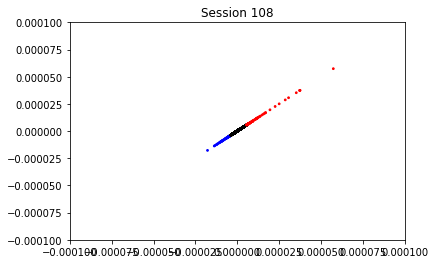

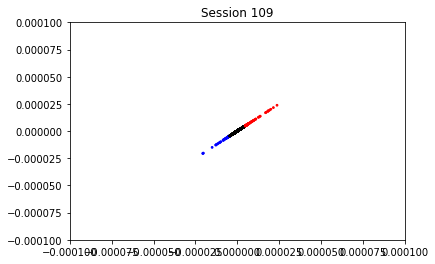

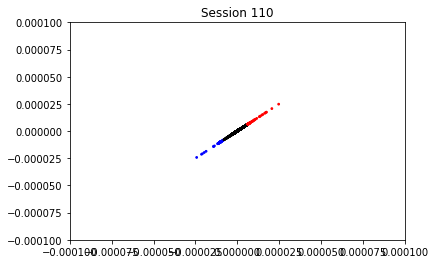

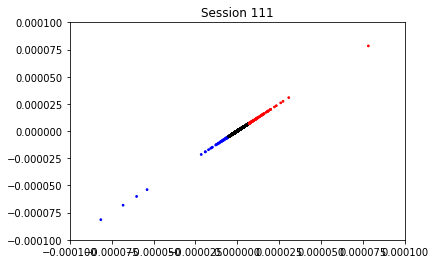

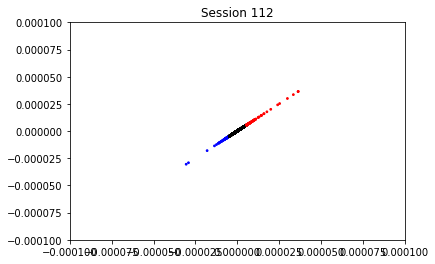

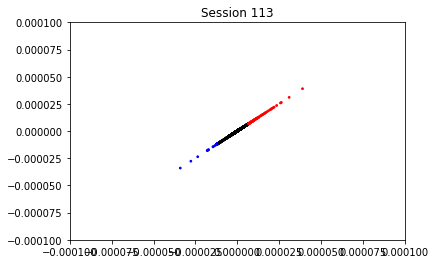

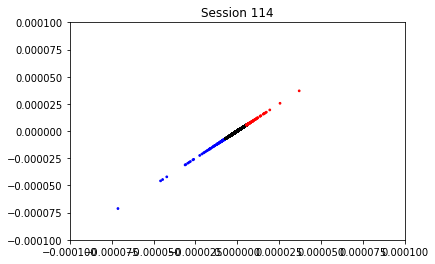

In [49]:
top_n = 100
for session, pearsons in new_bi_pearsons.items():
    colors = ['blue']*top_n + ['black']*(len(pearsons)-2*top_n) + ['red']*top_n
    plt.title('Session ' + str(session))
    plt.scatter(sorted(pearsons.values()), sorted(pearsons.values()), c=colors, s=3)
    plt.xlim((-1e-04, 1e-04))
    plt.ylim((-1e-04, 1e-04))
    plt.show()
#     plt.hist(pearsons.values(), normed=True, bins=15)
#     plt.ylabel('Probability');
#     plt.show()

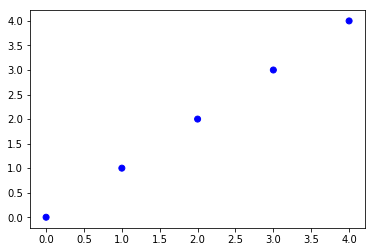

In [38]:
plt.scatter([0,1,2,3,4], [0,1,2,3,4], c=colors)
plt.show()

In [39]:
for session, pearsons in new_bi_pearsons.items():
    print(min(pearsons.values()), max(pearsons.values()))

-1.774984860502351e-05 5.73981760510823e-05
-2.058735975419063e-05 2.376702985542692e-05
-2.4232697961042787e-05 2.4754530873147255e-05
-8.149228728099649e-05 7.834280811138317e-05
-3.0492333899866966e-05 3.646957110128394e-05
-3.402263912174049e-05 3.899048570717932e-05
-7.125151434586521e-05 3.701261170874772e-05


In [77]:
news_bi_articles = {}
news_tri_articles = {}
sources = ["dkos", "motherjones", "nymag", "nypost", "townhall", "breitbart"]
for source in sources:
    print("Opening Source", source)
    news_bi_articles[source] = pickle.load(open(source + '_bigrams_new.p', 'rb'))
    news_tri_articles[source] = pickle.load(open(source + '_trigrams_new.p', 'rb'))

Opening Source dkos
Opening Source motherjones
Opening Source nymag
Opening Source nypost
Opening Source townhall
Opening Source breitbart


In [79]:
for source in sources:
    num_articles = len(news_bi_articles[source])
    num_bigrams = sum([len(a['bigram']) for a in news_bi_articles[source]])
    num_trigrams = sum([len(a['trigram']) for a in news_tri_articles[source]])
    print(source + ":", num_articles, num_bigrams, num_trigrams)

dkos: 96030 1910703 367449
motherjones: 18534 734179 126516
nymag: 19324 464025 63577
nypost: 2119 32938 5082
townhall: 97730 2862763 574804
breitbart: 84909 1784866 399584


In [76]:
for source, articles in news_tri_articles.items():
    num_articles = len(articles)
    
    print(source + ":", num_articles, num_trigrams)

dkos: 96030 367449
motherjones: 18534 126516
nymag: 19324 63577
nypost: 2119 5082
townhall: 97730 574804
breitbart: 84909 399584


In [82]:
for source in sources:
    num_articles = len(news_bi_articles[source])
    num_bigrams = sum([len(a['bigram']) for a in news_bi_articles[source]])
    num_trigrams = sum([len(a['trigram']) for a in news_tri_articles[source]])
    print(num_trigrams)
    

367449
126516
63577
5082
574804
399584


In [93]:
for session in bigrams:
    num_bigrams = len(bigrams[session])
    num_bigrams_new = len(new_bi_pearsons[session]) if session in new_bi_pearsons else 0         
#     print(session, num_bigrams, num_bigrams_new)
    print(num_bigrams_new)

0
0
49184
32925
37492
18147
15074
10186
7933


In [99]:
for session in trigrams:
    num_trigrams = len(trigrams[session])
    num_trigrams_new = len(new_tri_pearsons[session]) if session in new_tri_pearsons else 0         
#     print(session, num_trigrams, num_trigrams_new)
    print(num_trigrams)

50753
41164
50257
45242
54698
38688
37259
28968
22136


In [95]:
new_tri_pearsons = pickle.load(open('new_tri_pearsons.p', 'rb'))

In [101]:
for session, pearsons in new_bi_pearsons.items():
    print(sorted(pearsons.items(), key = lambda kv: kv[1])[:10])

[(('000', 'b'), -1.774984860502351e-05), (('overtim', 'protect'), -1.3716542503765384e-05), (('smart', 'secur'), -1.3244431389826625e-05), (('al', 'anbar'), -1.2292514936726345e-05), (('pendleton', 'ca'), -1.2119057769374747e-05), (('provinc', 'assign'), -1.1880120140110748e-05), (('away', 'overtim'), -1.1299700988439937e-05), (('anbar', 'provinc'), -1.0750145679750637e-05), (('iraq', 'watch'), -1.0425700285193855e-05), (('nobid', 'contract'), -1.0239963868331142e-05)]
[(('mr', 'meek'), -2.058735975419063e-05), (('ms', 'wasserman'), -2.037606787955932e-05), (('wasserman', 'schultz'), -2.0282223629666878e-05), (('cultur', 'corrupt'), -1.4992782381925166e-05), (('42', 'presid'), -1.2849612281934162e-05), (('peter', 'rodino'), -1.2602984296693077e-05), (('housedemocrat', 'gov'), -1.2602984296693077e-05), (('thirdparti', 'valid'), -1.1789318462069575e-05), (('educ', 'except'), -1.1305069646516001e-05), (('borrow', 'foreign'), -1.0470234173995234e-05)]
[(('retroact', 'immun'), -2.4232697961